#### Question 8
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model

In [1]:
%pip install scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Generate a linearly separable dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                          n_clusters_per_class=1, random_state=42)

In [5]:
X

array([[-0.87292898,  0.013042  ],
       [ 1.31293463,  2.77053357],
       [ 2.34042818,  2.42099601],
       [ 2.29454774, -0.40438019],
       [ 0.94410516,  0.4772409 ],
       [-0.11959689,  0.50891314],
       [ 0.1510847 ,  0.81007677],
       [-0.00745441, -0.45284256],
       [-1.25396925,  0.06769236],
       [-0.24392415,  1.19979806],
       [-1.9208928 ,  2.9189499 ],
       [ 0.48806269,  3.50578584],
       [ 2.25751204,  1.81515089],
       [-3.12190908,  0.62220145],
       [ 1.87768113,  0.51095984],
       [ 0.46785542,  0.7871928 ],
       [ 0.48404809,  0.04843842],
       [-0.54235518,  3.49536942],
       [ 1.04235818,  1.10204918],
       [ 1.63367133,  0.59219328],
       [ 1.85756778,  1.7382647 ],
       [-2.41167954, -0.80620914],
       [ 0.87481918,  0.48815664],
       [ 0.09529002,  0.57526555],
       [-1.64994223, -0.06695917],
       [-0.65245349, -0.19158949],
       [ 2.10252081,  2.34684404],
       [ 2.9574463 ,  2.01418031],
       [-1.70056309,

In [6]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train LinearSVC
linear_svc = LinearSVC(random_state=42, max_iter=10000)
linear_svc.fit(X_scaled, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [9]:
# Train SVC with linear kernel
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_scaled, y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Train SGDClassifier with hinge loss (mimics SVM)
sgd_clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_scaled, y)

,loss,'hinge'
,penalty,'l2'
,alpha,0.01
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [11]:
# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

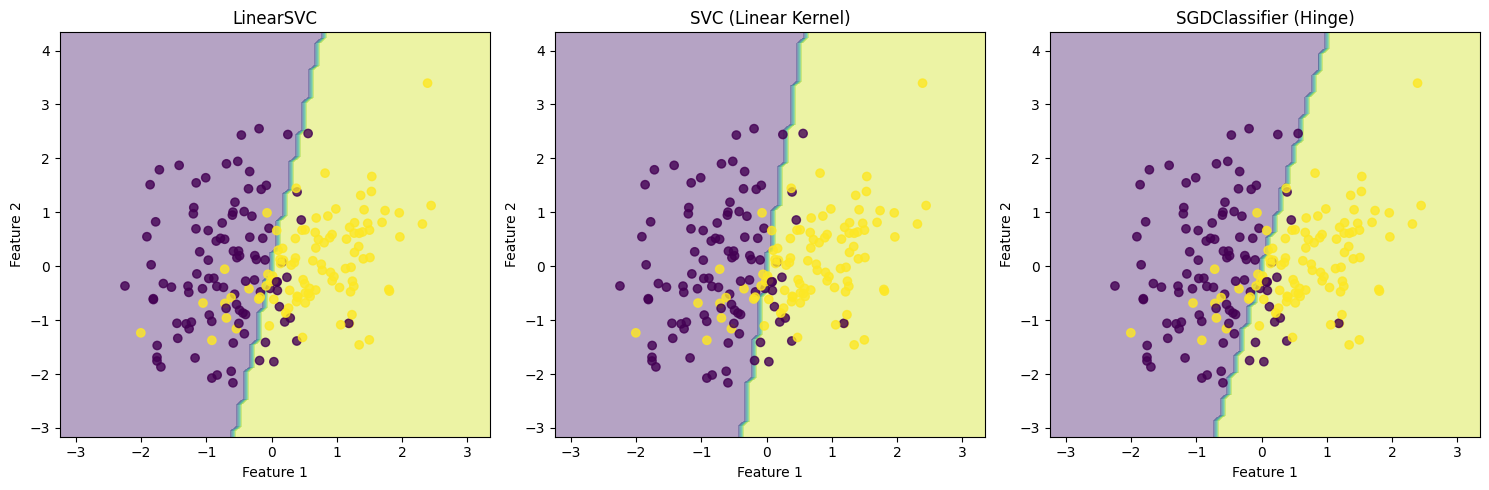

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_boundary(linear_svc, X_scaled, y, 'LinearSVC')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plot_decision_boundary(svc, X_scaled, y, 'SVC (Linear Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.subplot(133)
plot_decision_boundary(sgd_clf, X_scaled, y, 'SGDClassifier (Hinge)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [17]:

# Print coefficients to compare models
print("LinearSVC coefficients:", linear_svc.coef_)
print("SVC coefficients:", svc.coef_)
print("SGDClassifier coefficients:", sgd_clf.coef_)

LinearSVC coefficients: [[ 0.91939573 -0.16480049]]
SVC coefficients: [[ 1.8773827  -0.23821325]]
SGDClassifier coefficients: [[ 1.8672974  -0.43375369]]
